<a href="https://colab.research.google.com/github/Wikanes-k/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

###Generate Data

In [73]:
from sklearn.datasets import make_blobs

In [74]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)  #n_features คือ 2 มิติ  #Centers คือ แบ่งข้อมูลออกเป็นกี่กลุ่ม

###Explore data

In [75]:
X.shape #ขนาดของData

(500, 2)

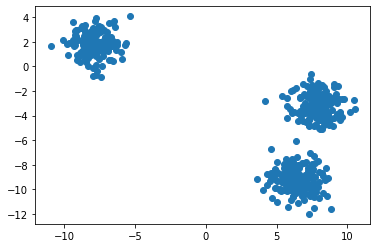

In [76]:
from matplotlib import pyplot as plt  #สุ่มออกมา 3 กลุ่ม   #นำเข้าเพื่อใช้วาดกราฟ
plt.scatter(X[:,0],X[:,1])

###Clustering

####Import

In [77]:
from sklearn.cluster import KMeans #นำเข้าเพราะเราจะทำการจักกลุ่ม cluster

####Define

In [78]:
kmeans = KMeans(n_clusters=2, random_state=6)  #กำหนดตัวแปร 

####Fit-Predict

In [79]:
y_clust = kmeans.fit_predict(X) #fit_transform คือให้จัดกลุ่มให้ dimension คำนวณได้ง่ายๆ 

In [80]:
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

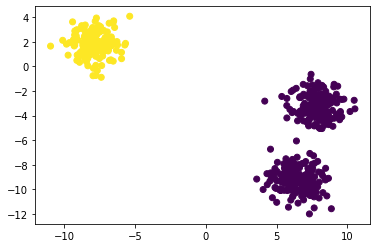

In [81]:
plt.scatter(X[:,0],X[:,1],c=y_clust) #ผลลัพธ์ออกมาเป็น สี 2 Cluster

3 clusters

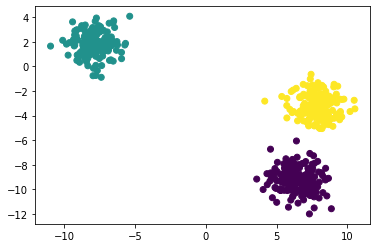

In [82]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

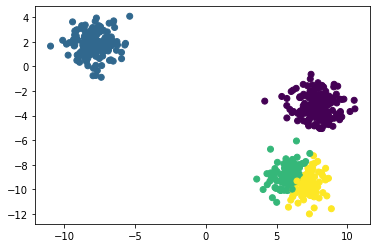

In [83]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

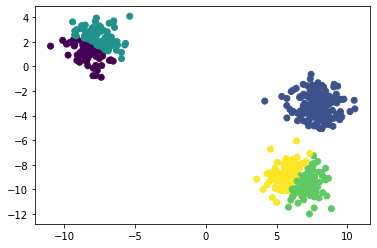

In [84]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random') #เปลี่ยนกลุ่ม
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

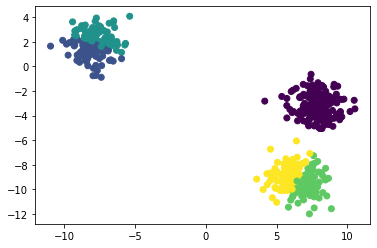

In [85]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random') #เปลี่ยนกลุ่ม
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

##Example Application (Color Quantization)

In [86]:
import cv2 #ใช้ในการโหลดภาพเข้า
import os #เพิ่มฟังก์ชั่นที่ต้องการใช้เพื่อใช้การภาพ การนำเข้าภาพ และการใช้สี

In [87]:
img = cv2.imread('/content/image2.jpg') #นำเข้าภาพจากไฟล์

In [88]:
img.shape

(256, 256, 3)

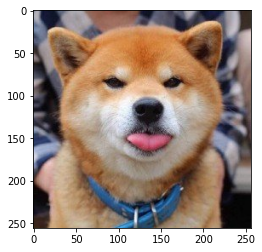

In [89]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img) #กำหนนดตัวแปร

###นับจำนวนสี

In [90]:
import numpy as np

In [91]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape #มี 42556 สี

(42556, 3)

###จัดกลุ่มสีให้เหลือ 16 สี

In [92]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [93]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape #แต่ละจุดคือแต่ละ pixel #มี65536จุด

(65536, 3)

In [94]:
final_color = myquantize.fit_predict(img_row)  #จัดกลุ่มให้มัน

###ใช้ centroid เป็นตัวแทนของสี

In [95]:
centroid = myquantize.cluster_centers_ #สีตัวแทนของมัน

In [96]:
centroid #16สี

array([[152.19751728, 117.2880264 ,  93.53189818],
       [ 44.62491187,  37.36216216,  44.31374853],
       [204.38110928, 191.0708402 , 183.87177375],
       [127.7660177 , 126.89451327, 139.1359292 ],
       [208.25422729, 147.41348801,  94.39697208],
       [ 16.29202454,  12.57521472,  16.67018405],
       [166.78775214, 159.82191532, 161.61057605],
       [ 46.81719533,  93.30300501, 139.43739566],
       [137.14996823,  92.70451176,  64.25841983],
       [209.85594762, 171.59112405, 139.79374318],
       [ 98.80036969,  93.54106153, 103.54000528],
       [190.05218447, 118.82008495,  63.41171117],
       [ 62.10342905,  65.32115974,  82.09506551],
       [226.24199674, 223.79978296, 225.31144872],
       [101.81598318,  62.50963898,  40.41184718],
       [172.72783093, 142.8837641 , 119.98443524]])

แทนสีคืนลงไป

In [97]:
new_img = np.zeros(RGB_img.shape)  #วูนลูปดูว่ามันสีอะไร อยู่ในclusterไหน แล้วแทนด้วยสีที่เป็น centroid ของมัน
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

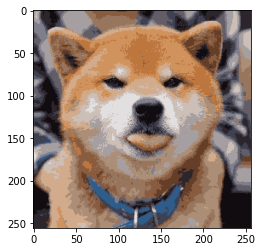

In [98]:
plt.imshow(new_img/255) #รูปที่เป็นColor Quantization

In [99]:
plt.imsave('img.jpg',new_img/255)

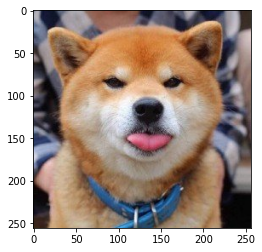

In [100]:
plt.imshow(RGB_img) #นำมาเทียบกัน

#Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

#Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation